# MPOX AFRICA ANALYSIS

This report presents an analysis of mpox (monkeypox) data in Africa, utilizing a comprehensive dataset sourced from the World Health Organization (WHO) directory. The data spans from January 2022 to September 2024, providing a timely overview of the disease's progression across the continent. Our analysis aims to uncover key insights regarding trends in mpox infections, demographic impacts, and regional variations, ultimately contributing to a better understanding of the current epidemiological landscape and informing public health strategies.

I'm going to make the codes and analysis in the subsequent section well understandable for those who will be interested in mpox analysis and also those who want to learn python.


In [5]:
## Here we are going to import all the necessary libraries we are going to need for the project.
## Numpy and Pandas for data manipulation and then matplotlib and seaborn for visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In the cell below we are going to read the already downloaded csv file with the help of pandas

In [8]:
file_path = 'C:\\Users\\DELE ELSON\\Documents\\weekly AFR cases by country as of 01 September 2024.csv'.strip()

# The strip function helps clear off any whitespaces or traling characters

In [10]:
mpox_df = pd.read_csv(file_path)

In [12]:
mpox_df

,country,iso3,week_end_date,total_confirmed_cases,total_probable_cases,total_suspected_cases,total_deaths,total_suspected_deaths,new_confirmed_cases,new_probable_cases,new_suspected_cases,new_deaths,new_suspected_deaths
0,Benin,BEN,2022-07-03,3,0,NaN,0,NaN,0,0,NaN,0,NaN
1,Benin,BEN,2022-08-07,3,0,NaN,0,NaN,0,0,NaN,0,NaN
2,Benin,BEN,2022-10-30,3,0,NaN,0,NaN,0,0,NaN,0,NaN
3,Benin,BEN,2022-12-04,3,0,NaN,0,NaN,0,0,NaN,0,NaN
4,Benin,BEN,2023-01-08,3,0,NaN,0,NaN,0,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,Democratic Republic of the Congo,COD,2024-08-25,4489,0,18232.0,27,617.0,0,0,1254.0,0,23.0
1430,Democratic Republic of the Congo,COD,2024-09-01,4489,0,19064.0,27,629.0,0,0,832.0,0,12.0
1431,Burundi,BDI,2024-09-01,313,0,1114.0,0,0.0,82,0,294.0,0,0.0
1432,Kenya,KEN,2024-09-01,4,0,NaN,0,NaN,2,0,NaN,0,NaN


# Data Preparation and cleaning 

Here we're going to inspect out dataset for correct data types, missing values and creating new data within our dataset for indepth analysis. We would firtly create a duplicate for our dataset incase we need recall.

In [15]:
mpox_df_duplicate = mpox_df.copy()

In [17]:
mpox_df.info() #info function gives us a brief knowledge of columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 1434 non-null   object 
 1   iso3                    1434 non-null   object 
 2   week_end_date           1434 non-null   object 
 3   total_confirmed_cases   1434 non-null   int64  
 4   total_probable_cases    1434 non-null   int64  
 5   total_suspected_cases   63 non-null     float64
 6   total_deaths            1434 non-null   int64  
 7   total_suspected_deaths  63 non-null     float64
 8   new_confirmed_cases     1434 non-null   int64  
 9   new_probable_cases      1434 non-null   int64  
 10  new_suspected_cases     63 non-null     float64
 11  new_deaths              1434 non-null   int64  
 12  new_suspected_deaths    63 non-null     float64
dtypes: float64(4), int64(6), object(3)
memory usage: 145.8+ KB


In [19]:
mpox_df.describe()  #describe gives us statistical summary of our dataset

,total_confirmed_cases,total_probable_cases,total_suspected_cases,total_deaths,total_suspected_deaths,new_confirmed_cases,new_probable_cases,new_suspected_cases,new_deaths,new_suspected_deaths
count,1434.000000,1434.0,63.000000,1434.000000,63.000000,1434.000000,1434.0,63.000000,1434.000000,63.000000
mean,177.799163,0.0,4254.301587,1.792190,194.238095,4.291492,0.0,320.285714,0.037657,10.000000
std,506.465085,0.0,5400.955945,3.264569,210.138949,18.462503,0.0,334.936269,0.250563,12.246132
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,12.000000,0.0,1171.000000,0.000000,100.000000,0.000000,0.0,273.000000,0.000000,6.000000
75%,65.750000,0.0,7113.500000,3.000000,368.500000,1.000000,0.0,486.500000,0.000000,15.000000
max,4489.000000,0.0,19064.000000,27.000000,629.000000,225.000000,0.0,1254.000000,4.000000,49.000000


Looking into our info summary we can see that the columns total_suspected_deaths, total_suspected_cases, new_suspected_cases, new_suspected_death have 63 non-null values compared to other columns with 1434 non-null values, that over 95% missing data which is alot, plus those columns are not so relevant to our analysis, so we would be dropping them.
We would also be dropping the total_probable_cases and new_probable_cases as they do not conatin any value other than 0 which make the column useless to our analysis.


In [23]:
# Dropping columns with a high number of nulls
mpox_df = mpox_df.drop(columns=['total_suspected_cases', 'total_suspected_deaths', 
                               'new_suspected_cases', 'new_suspected_deaths', 'total_probable_cases', 'new_probable_cases'])

In [25]:
mpox_df

,country,iso3,week_end_date,total_confirmed_cases,total_deaths,new_confirmed_cases,new_deaths
0,Benin,BEN,2022-07-03,3,0,0,0
1,Benin,BEN,2022-08-07,3,0,0,0
2,Benin,BEN,2022-10-30,3,0,0,0
3,Benin,BEN,2022-12-04,3,0,0,0
4,Benin,BEN,2023-01-08,3,0,0,0
...,...,...,...,...,...,...,...
1429,Democratic Republic of the Congo,COD,2024-08-25,4489,27,0,0
1430,Democratic Republic of the Congo,COD,2024-09-01,4489,27,0,0
1431,Burundi,BDI,2024-09-01,313,0,82,0
1432,Kenya,KEN,2024-09-01,4,0,2,0


In [29]:
pd.set_option('display.max_rows', 1434) #code to display all rows
mpox_df

,country,iso3,week_end_date,total_confirmed_cases,total_deaths,new_confirmed_cases,new_deaths
0,Benin,BEN,2022-07-03,3,0,0,0
1,Benin,BEN,2022-08-07,3,0,0,0
2,Benin,BEN,2022-10-30,3,0,0,0
3,Benin,BEN,2022-12-04,3,0,0,0
4,Benin,BEN,2023-01-08,3,0,0,0
5,Benin,BEN,2023-04-02,3,0,0,0
6,Benin,BEN,2023-05-07,3,0,0,0
7,Benin,BEN,2023-07-30,3,0,0,0
8,Benin,BEN,2023-09-03,3,0,0,0
9,Benin,BEN,2023-11-26,3,0,0,0


In [31]:
mpox_df.tail(60)

,country,iso3,week_end_date,total_confirmed_cases,total_deaths,new_confirmed_cases,new_deaths
1374,South Africa,ZAF,2022-02-20,0,0,0,0
1375,South Africa,ZAF,2022-03-27,0,0,0,0
1376,South Africa,ZAF,2022-06-19,0,0,0,0
1377,Mozambique,MOZ,2022-01-23,0,0,0,0
1378,Mozambique,MOZ,2022-02-27,0,0,0,0
1379,Mozambique,MOZ,2022-05-22,0,0,0,0
1380,Mozambique,MOZ,2022-06-26,0,0,0,0
1381,Mozambique,MOZ,2022-09-18,0,0,0,0
1382,Uganda,UGA,2024-06-30,0,0,0,0
1383,South Africa,ZAF,2022-01-16,0,0,0,0


Looking at the dataset much more closely we would see that our country column is disorganized it doesn't follow an alphabetical format in the column, now we would sort and organize the column correctly in the cells below. 

In [34]:
mpox_df = mpox_df.sort_values(by='country', ascending=True) # sorts our dataframe country column in A-Z order

In [36]:
mpox_df.reset_index(drop=True, inplace=True) # resets index number correctly

In [38]:
mpox_df

,country,iso3,week_end_date,total_confirmed_cases,total_deaths,new_confirmed_cases,new_deaths
0,Benin,BEN,2022-07-03,3,0,0,0
1,Benin,BEN,2022-05-01,0,0,0,0
2,Benin,BEN,2024-07-28,3,0,0,0
3,Benin,BEN,2024-05-05,3,0,0,0
4,Benin,BEN,2024-03-31,3,0,0,0
5,Benin,BEN,2024-01-07,3,0,0,0
6,Benin,BEN,2022-11-13,3,0,0,0
7,Benin,BEN,2022-02-06,0,0,0,0
8,Benin,BEN,2023-02-05,3,0,0,0
9,Benin,BEN,2023-04-16,3,0,0,0


In [40]:
mpox_df.tail(60)

,country,iso3,week_end_date,total_confirmed_cases,total_deaths,new_confirmed_cases,new_deaths
1374,South Africa,ZAF,2024-06-30,21,3,0,0
1375,South Africa,ZAF,2024-01-07,5,0,0,0
1376,South Africa,ZAF,2024-08-11,29,3,0,0
1377,South Africa,ZAF,2024-08-18,29,3,0,0
1378,South Africa,ZAF,2023-10-15,5,0,0,0
1379,South Africa,ZAF,2023-09-10,5,0,0,0
1380,South Africa,ZAF,2023-06-18,5,0,0,0
1381,South Africa,ZAF,2023-05-14,5,0,0,0
1382,South Africa,ZAF,2023-02-19,5,0,0,0
1383,South Africa,ZAF,2023-01-15,5,0,0,0


In [42]:
mpox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country                1434 non-null   object
 1   iso3                   1434 non-null   object
 2   week_end_date          1434 non-null   object
 3   total_confirmed_cases  1434 non-null   int64 
 4   total_deaths           1434 non-null   int64 
 5   new_confirmed_cases    1434 non-null   int64 
 6   new_deaths             1434 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 78.6+ KB


Now we want to create new columns for the year, month and day using the week_end_date column for more indepth analysis, however if we observe closely at the datatype for the week_end_date column, it's an object Dtype which cannot work for our planned manipulation so we would convert it to a Datetime Dtype.

In [45]:
mpox_df['week_end_date'] = pd.to_datetime(mpox_df['week_end_date'])

In [47]:
mpox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                1434 non-null   object        
 1   iso3                   1434 non-null   object        
 2   week_end_date          1434 non-null   datetime64[ns]
 3   total_confirmed_cases  1434 non-null   int64         
 4   total_deaths           1434 non-null   int64         
 5   new_confirmed_cases    1434 non-null   int64         
 6   new_deaths             1434 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 78.6+ KB


From the above Data frame info we can see that the week_end_date is now in the datetime Dtype which is now ready for manipulation.

In [50]:
mpox_df['year'] = mpox_df['week_end_date'].dt.year g
mpox_df['month'] = mpox_df['week_end_date'].dt.month
mpox_df['day'] = mpox_df['week_end_date'].dt.day


In [52]:
mpox_df

,country,iso3,week_end_date,total_confirmed_cases,total_deaths,new_confirmed_cases,new_deaths,year,month,day
0,Benin,BEN,2022-07-03,3,0,0,0,2022,7,3
1,Benin,BEN,2022-05-01,0,0,0,0,2022,5,1
2,Benin,BEN,2024-07-28,3,0,0,0,2024,7,28
3,Benin,BEN,2024-05-05,3,0,0,0,2024,5,5
4,Benin,BEN,2024-03-31,3,0,0,0,2024,3,31
5,Benin,BEN,2024-01-07,3,0,0,0,2024,1,7
6,Benin,BEN,2022-11-13,3,0,0,0,2022,11,13
7,Benin,BEN,2022-02-06,0,0,0,0,2022,2,6
8,Benin,BEN,2023-02-05,3,0,0,0,2023,2,5
9,Benin,BEN,2023-04-16,3,0,0,0,2023,4,16


As we all know africa is a regional country, and there is no classification of countries in our dataset into their respective regions, in view of that we would map each country to their respective region. However before we can do that we need to know the countries in our dataset

In [55]:
countries = mpox_df['country'].unique()

In [57]:
print(countries)

['Benin' 'Burundi' 'Cameroon' 'Central African Republic' 'Congo'
 'Côte d’Ivoire' 'Democratic Republic of the Congo' 'Egypt' 'Gabon'
 'Ghana' 'Kenya' 'Liberia' 'Morocco' 'Mozambique' 'Nigeria' 'Rwanda'
 'South Africa' 'Sudan' 'Uganda']


In [59]:
country_to_zone = {
    'Algeria': 'North Africa',
    'Benin': 'West Africa',
    'Burundi': 'East Africa',
    'Cameroon': 'Central Africa',
    'Central African Republic': 'Central Africa',
    'Congo': 'Central Africa',
    'Côte d’Ivoire': 'West Africa',
    'Democratic Republic of the Congo': 'Central Africa',
    'Egypt': 'North Africa',
    'Gabon': 'Central Africa',
    'Ghana': 'West Africa',
    'Kenya': 'East Africa',
    'Liberia': 'West Africa',
    'Morocco': 'North Africa',
    'Mozambique': 'Southern Africa',
    'Nigeria': 'West Africa',
    'Rwanda': 'East Africa',
    'South Africa': 'Southern Africa',
    'Sudan': 'North Africa',
    'Uganda': 'East Africa',
}

# Map each country to its corresponding region
mpox_df['region'] = mpox_df['country'].map(country_to_zone)

In [61]:
mpox_df

,country,iso3,week_end_date,total_confirmed_cases,total_deaths,new_confirmed_cases,new_deaths,year,month,day,region
0,Benin,BEN,2022-07-03,3,0,0,0,2022,7,3,West Africa
1,Benin,BEN,2022-05-01,0,0,0,0,2022,5,1,West Africa
2,Benin,BEN,2024-07-28,3,0,0,0,2024,7,28,West Africa
3,Benin,BEN,2024-05-05,3,0,0,0,2024,5,5,West Africa
4,Benin,BEN,2024-03-31,3,0,0,0,2024,3,31,West Africa
5,Benin,BEN,2024-01-07,3,0,0,0,2024,1,7,West Africa
6,Benin,BEN,2022-11-13,3,0,0,0,2022,11,13,West Africa
7,Benin,BEN,2022-02-06,0,0,0,0,2022,2,6,West Africa
8,Benin,BEN,2023-02-05,3,0,0,0,2023,2,5,West Africa
9,Benin,BEN,2023-04-16,3,0,0,0,2023,4,16,West Africa


## Exploratory Data Analysis and Visualization


Now that our data is clean enough we can go ahead to explore it and do some visualizations to further have an understanding of the dataset and find possible trends and patterns.

The seaborn and matplotlib libraries are going to be particularly useful here.

In [66]:
total_cases = mpox_df.groupby(['year', 'country'])['new_confirmed_cases'].sum().reset_index()

In [68]:
total_cases

,year,country,new_confirmed_cases
0,2022,Benin,3
1,2022,Cameroon,18
2,2022,Central African Republic,30
3,2022,Congo,5
4,2022,Democratic Republic of the Congo,279
5,2022,Egypt,3
6,2022,Ghana,121
7,2022,Liberia,6
8,2022,Morocco,3
9,2022,Mozambique,1


In [70]:
pivot_total_cases = total_cases.pivot(index='country', columns='year', values='new_confirmed_cases').fillna(0)
# the pivot function helps us reshape our dataset to a pivot table  where the year is the column and country is the row.

Text(0.5, 1.0, 'Total Confirmed cases by Year')

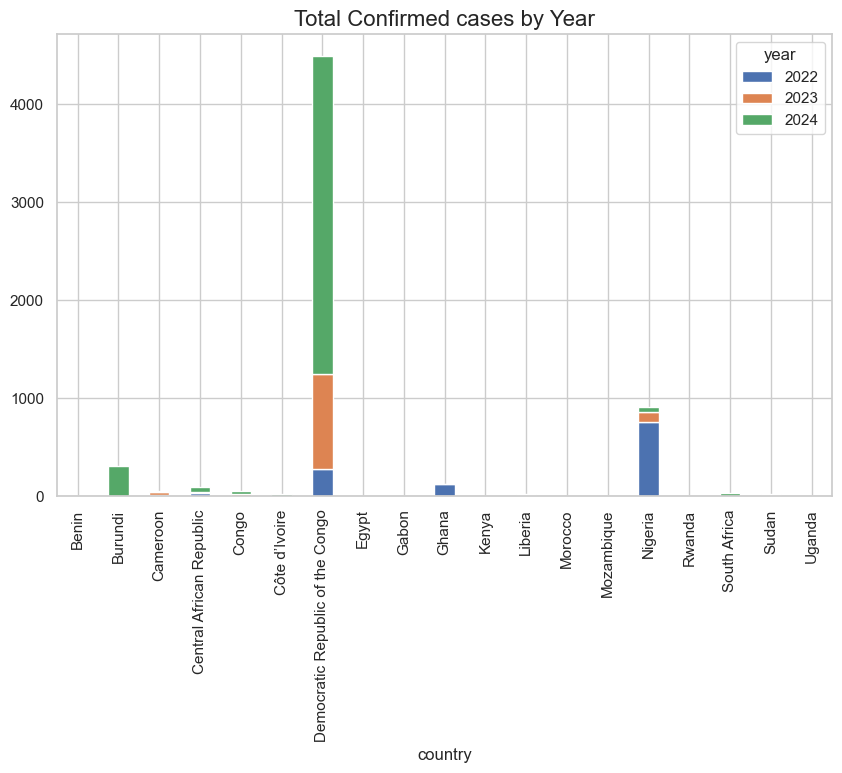

In [86]:

sns.set(style="whitegrid")
colors = sns.color_palette("deep", n_colors=len(pivot_total_cases.columns))
ax = pivot_total_cases.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_title('Total Confirmed cases by Year', fontsize=16)


From the analysis and visualization above we can deduct that the highest number of cases occured in Democratic republic of congo in 2024 and 2023, Nigeria in 2022, Burundi in 2024, Democratic republic of congo 2022, ghana 2022 and Nigeria 2023 all respectively.

In [80]:
total_deaths = mpox_df.groupby(['year', 'country'])['new_deaths'].sum().reset_index()

In [82]:
total_deaths

,year,country,new_deaths
0,2022,Benin,0
1,2022,Cameroon,3
2,2022,Central African Republic,0
3,2022,Congo,0
4,2022,Democratic Republic of the Congo,0
5,2022,Egypt,0
6,2022,Ghana,4
7,2022,Liberia,0
8,2022,Morocco,0
9,2022,Mozambique,1


Text(0.5, 1.0, 'Total Confirmed Deaths by Year')

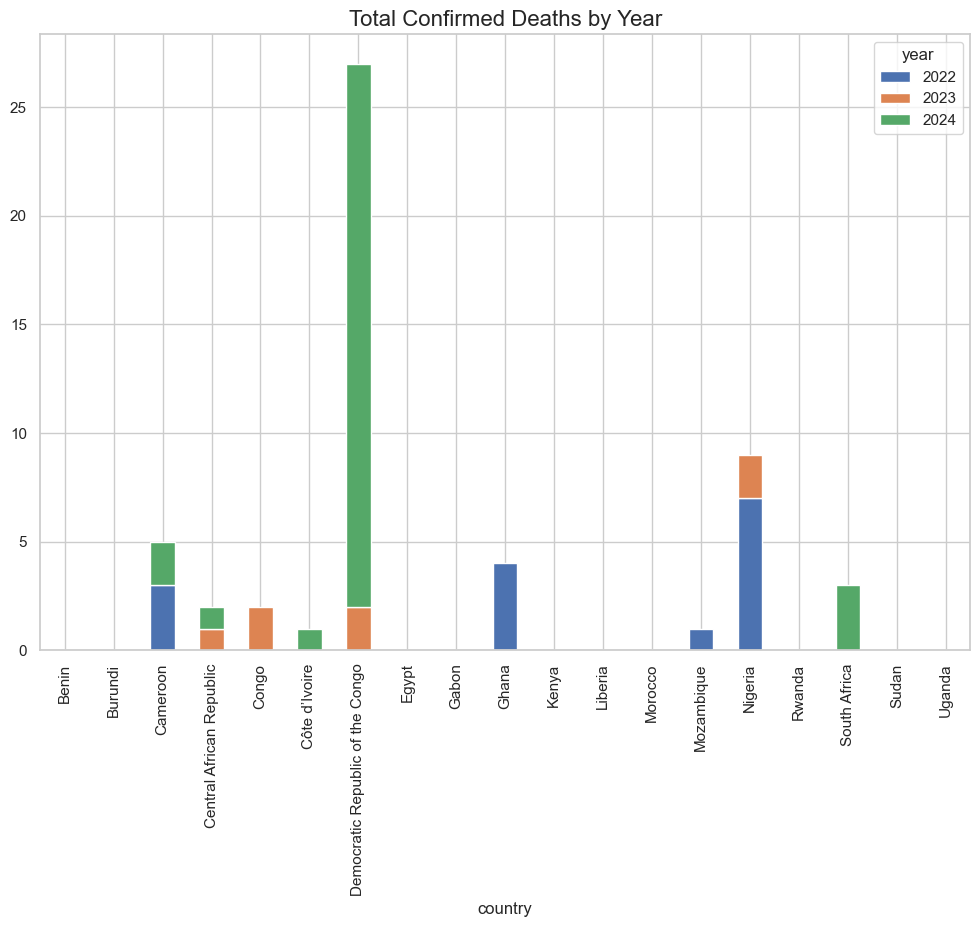

In [88]:
pivot_total_deaths = total_deaths.pivot(index='country', columns='year', values='new_deaths').fillna(0)

sns.set(style="whitegrid")
colors = sns.color_palette("deep", n_colors=len(pivot_total_cases.columns))
ax = pivot_total_deaths.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
ax.set_title('Total Confirmed Deaths by Year', fontsize=16)

From the analysis and visualization above we can deduct that the highest number of cases occured in Democratic republic of congo in 2024, Nigeria 2022, Ghana 2022, Cameroon 2022 and South africa 2024 respectively.


In [92]:
mpox_df['CFR (%)'] = mpox_df.apply(
    lambda row: (row['new_deaths'] / row['new_confirmed_cases']) * 100 if row['new_confirmed_cases'] > 0 else 0,
    axis=1
)
# The apply method allows us to apply a fuction within an axis of our dataframe, which in this case is the lamda function that deals with a specific
#arguement withinin our specified axis

In [96]:
country_cfr = mpox_df.groupby('country', as_index=False).agg(
    Total_Confirmed_Cases=('new_confirmed_cases', 'sum'),
    Total_Deaths=('new_deaths', 'sum'),
    CFR=('CFR (%)', 'mean')
)

(country_cfr[['country', 'Total_Confirmed_Cases', 'Total_Deaths', 'CFR']])

# .agg() method does group statistical aggretions as shown above

,country,Total_Confirmed_Cases,Total_Deaths,CFR
0,Benin,3,0,0.000000
1,Burundi,313,0,0.000000
2,Cameroon,50,5,1.459854
3,Central African Republic,92,2,0.437956
4,Congo,49,2,0.905797
5,Côte d’Ivoire,28,1,0.694444
6,Democratic Republic of the Congo,4489,27,0.192030
7,Egypt,3,0,0.000000
8,Gabon,1,0,0.000000
9,Ghana,127,4,0.253056


In [110]:
country_cfr_sorted = country_cfr[['country', 'Total_Confirmed_Cases', 'Total_Deaths', 'CFR']].sort_values(by='CFR', ascending=False).reset_index()


In [112]:
country_cfr_sorted

,index,country,Total_Confirmed_Cases,Total_Deaths,CFR
0,2,Cameroon,50,5,1.459854
1,16,South Africa,29,3,1.277372
2,4,Congo,49,2,0.905797
3,14,Nigeria,909,9,0.815089
4,5,Côte d’Ivoire,28,1,0.694444
5,3,Central African Republic,92,2,0.437956
6,9,Ghana,127,4,0.253056
7,6,Democratic Republic of the Congo,4489,27,0.192030
8,12,Morocco,5,0,0.000000
9,17,Sudan,19,0,0.000000


In the cells above we calculated the Case Fatality Ratio, which simply means the percentage of a diseased population dying from that particular disease. From our analysis we can see that cameroon so far has the highest CFR, followed by south africa, DCR which has the highest number of cases and deaths is number 7 on the CFR list.


In [115]:
mpox_df.to_csv('data.csv', index=False)

In the cell above we export our cleaned dataset for indepth analysis on MS Power bi using statistical visulizations and Dashboards to draw our final conclusions.